# Text Generator

We are going to develop a text generator based on Markov Chains, and try different inputs and hiperparameters in order to achieve concrete outcomes that help us understand the possibilities of this technique. 

First we are going to model the problem with some classes in order to make the development easier.

In [406]:
from numpy.random import choice
from collections import Counter
import matplotlib.pyplot as plt

class Token:
    def __init__(self, words):
        self.words = words
        self.count_following_tokens = 0
        self.following_tokens = {}

    def add_following_token(self, other_token):
        self.following_tokens[other_token] = self.following_tokens.get(other_token, 0) + 1
        self.count_following_tokens += 1
        
    def generate_next_token(self):
        next_tokens = list(self.following_tokens.keys())
        next_tokens_prob = list(map(lambda x: x / self.count_following_tokens, list(self.following_tokens.values())))
        if len(next_tokens) == 0:
            return None
        return choice(next_tokens, 1, p = next_tokens_prob)[0]
    
    def __repr__(self):
        return " ".join(list(map(str, self.words)))
    
    def __str__(self):
        return " ".join(list(map(str, self.words)))
    
    def __hash__(self):
        return hash("".join(list(map(str, self.words))))

    
    def __eq__(self, other):
        return type(other) == Token and self.words == other.words
    
    def __ne__(self, other):
        return type(other) != Token or self.words != other.words
        
        
class Word:
    def __init__(self, word):
        self.word = word
        
    def __repr__(self):
        return self.word
    
    def __str__(self):
        return self.word
    
    def __hash__(self):
        return hash(self.word)
    
    def __eq__(self, other):
        return type(other) == Word and self.word == other.word
    
    def __ne__(self, other):
        return type(other) != Word or self.word != other.word
        
class TextGenerator:
    def __init__(self, text, token_size):
        self.words_dict = {}
        self.words_list = []
        self.tokens_dict = {}
        self.tokens_list = []
        self.common_words = ["de", "la", "el", "en", "y", "del", "los", "a", "las", "que", "por", "se", "con", "un", "como", "una", "más", "es", "al", "su", "entre", "fue", "o", "también", "para", "son", "ha", "este", "desde", "lo", "sus", "si", "no", "uno", "sobre", "dos", "hasta", "durante", "the", "to", "and", "i", "you", "of", "we", "it", "that", "have", "they", "in", "going", "so", "is", "but", "were", "its", "be", "are", "for", "our", "this", "dont", "was", "do", "not", "with", "he", "im", "all", "what", "because", "want", "me", "said", "theyre", "on", "very", "about", "like", "if", "one", "them", "will", "at", "thats", "just", "now", "by", "when", "up", "these", "look", "been", "go", "from", "lot", "can", "know", "got", "many", "there", "my", "had", "good", "well", "make", "an", "or", "get", "think", "right", "out", "us", "really", "has", "hes", "as", "way", "mean", "much", "would", "over", "even", "who", "take", "youre", "ive", "than", "some", "never", "tell", "she", "doing", "time", "then", "say", "see", "other", "how", "their", "cant", "more", "didnt", "did", "things", "thing", "him", "where", "ever", "your", "into", "okay", "which", "something", "here", "need", "guy", "could", "ill", "why", "talk", "down", "done", "bad", "those", "actually", "weve", "let", "better", "ago", "new", "only", "came", "oh", "s", "apap", "ap", "unk"]
        self.available_characters = "abcdefghijklmnñopqrstuvwxyzáéíóú"
        self.text = text
        self.token_size = token_size
        
    def process_text(self):
        self.split_words()
        self.generate_tokens()
        self.calculate_probabilities()
        
    def split_words(self):
        words = self.text.split()
        for word in words:
            word = self.curate_word(word)
            if (word == ""):
                continue
            self.words_dict[word] = self.words_dict.get(word, Word(word))
            self.words_list.append(self.words_dict[word])

    def generate_tokens(self):
        for i in range(0, (len(self.words_list) // self.token_size) * self.token_size, self.token_size):
            previous_words = tuple([self.words_list[j] for j in range(i, i + self.token_size)])
            self.tokens_dict[previous_words] = self.tokens_dict.get(previous_words, Token(previous_words))
            self.tokens_list.append(self.tokens_dict[previous_words])

    def calculate_probabilities(self):
        for i in range(len(self.tokens_list) - 1):
            self.tokens_list[i].add_following_token(self.tokens_list[i + 1])

    def curate_word(self, word):
        word = word.lower()
        curated_word = ""
        for c in word:
            if c in self.available_characters:
                curated_word += c
        return curated_word
    
    def generate_text(self, length):
        generated_text = [self.pick_random_token()]
        for i in range(length - 1):
            next_token = generated_text[i].generate_next_token()
            if next_token == None:
                next_token = self.pick_random_token()
                print("RANDOM: " + str(next_token))
            generated_text.append(next_token)
        return ' '.join(list(map(str, generated_text)))
        
    def pick_random_token(self):
        return choice(list(self.tokens_dict.values()))
    
    def plot_most_important_words(self, n):
        counter = Counter(self.words_list)    
        words = sorted(counter.items(), key = lambda x: -x[1])
        most_important_words = []
        most_important_words_count = []
        for word in words:
            if word[0].word not in self.common_words:
                most_important_words.append(word[0].word)
                most_important_words_count.append(word[1])
                if (len(most_important_words) == n):
                    break
        fig = plt.figure(figsize=(30,10))
        plt.bar(most_important_words, most_important_words_count, orientation='vertical')
        fig.suptitle('Most important words', fontsize=40)
        plt.xticks(rotation=45, fontsize=20)
        
    def debug(self):
        for token in self.tokens_dict.values():
            print(str(token) + " " + str(token.following_tokens))

In [407]:
textGenerator = TextGenerator('a b a c a c a c d', 2)
textGenerator.process_text()
textGenerator.generate_text(10)

'a b a c a c a c a c a c a c a c a c a c'

# Página de Argentina en Wikipedia
A continuación alimentaremos el generador de texto con la página de Argentina en español.

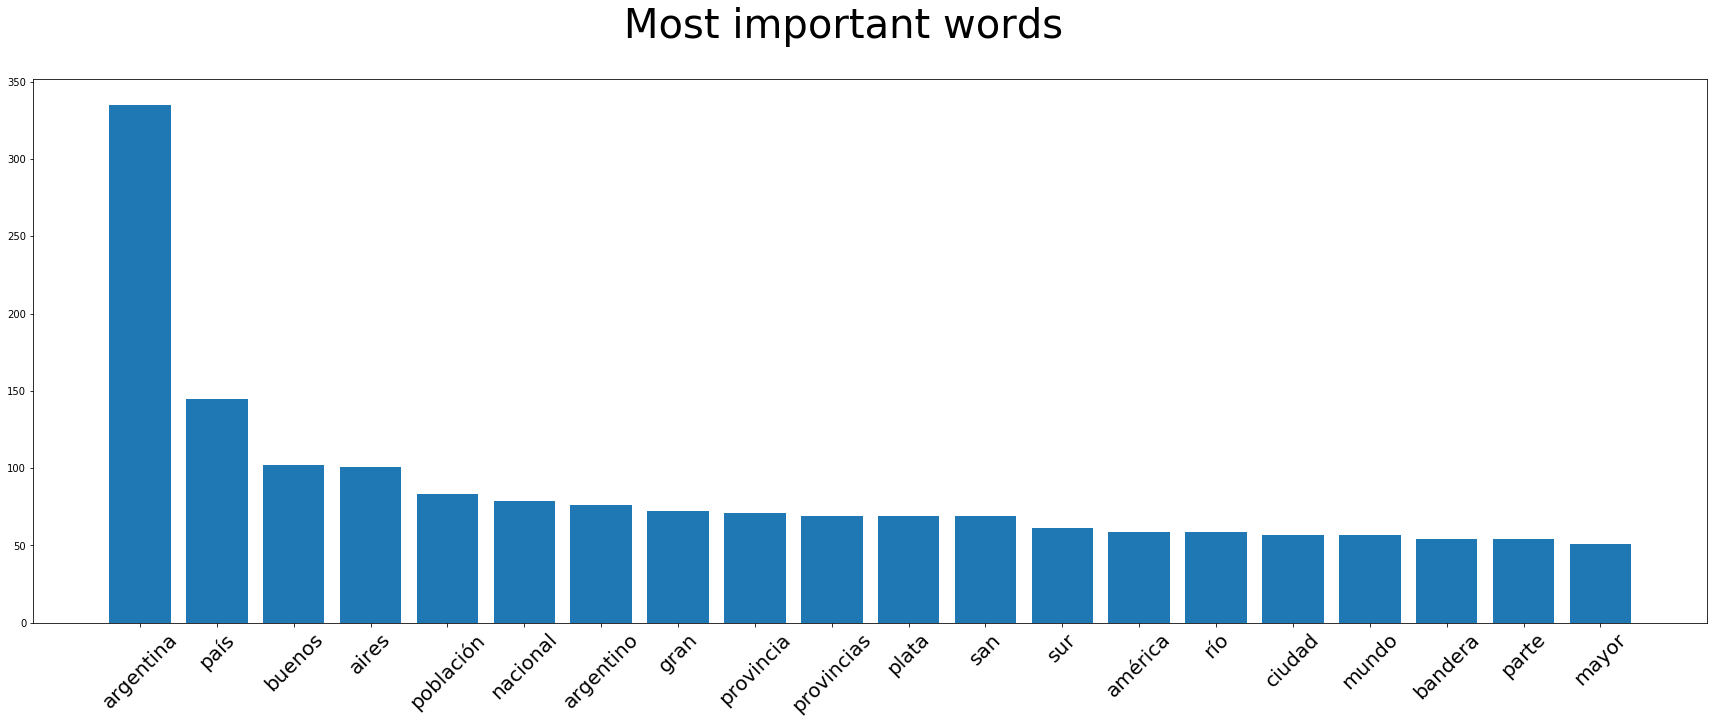

In [412]:
argentina_file = open("Argentina.txt")
argentina_content = " ".join(argentina_file.readlines())
textGeneratorArgentina = TextGenerator(argentina_content, 3)
textGeneratorArgentina.process_text()
textGeneratorArgentina.plot_most_important_words(20)

In [413]:
textGeneratorArgentina.generate_text(15)

'memoria familiar de esa pertenencia en el censo realizado en el personas se autorreconocieron como indígenas o descendientes de pueblos indígenas representando con ello el de la población igual que en los estados unidos en forma ligeramente superior a oceanía y por debajo de inglaterra'

# Página de Estados Unidos en Wikipedia
A continuación alimentaremos el generador de texto con la página de Estados Unidos en español.

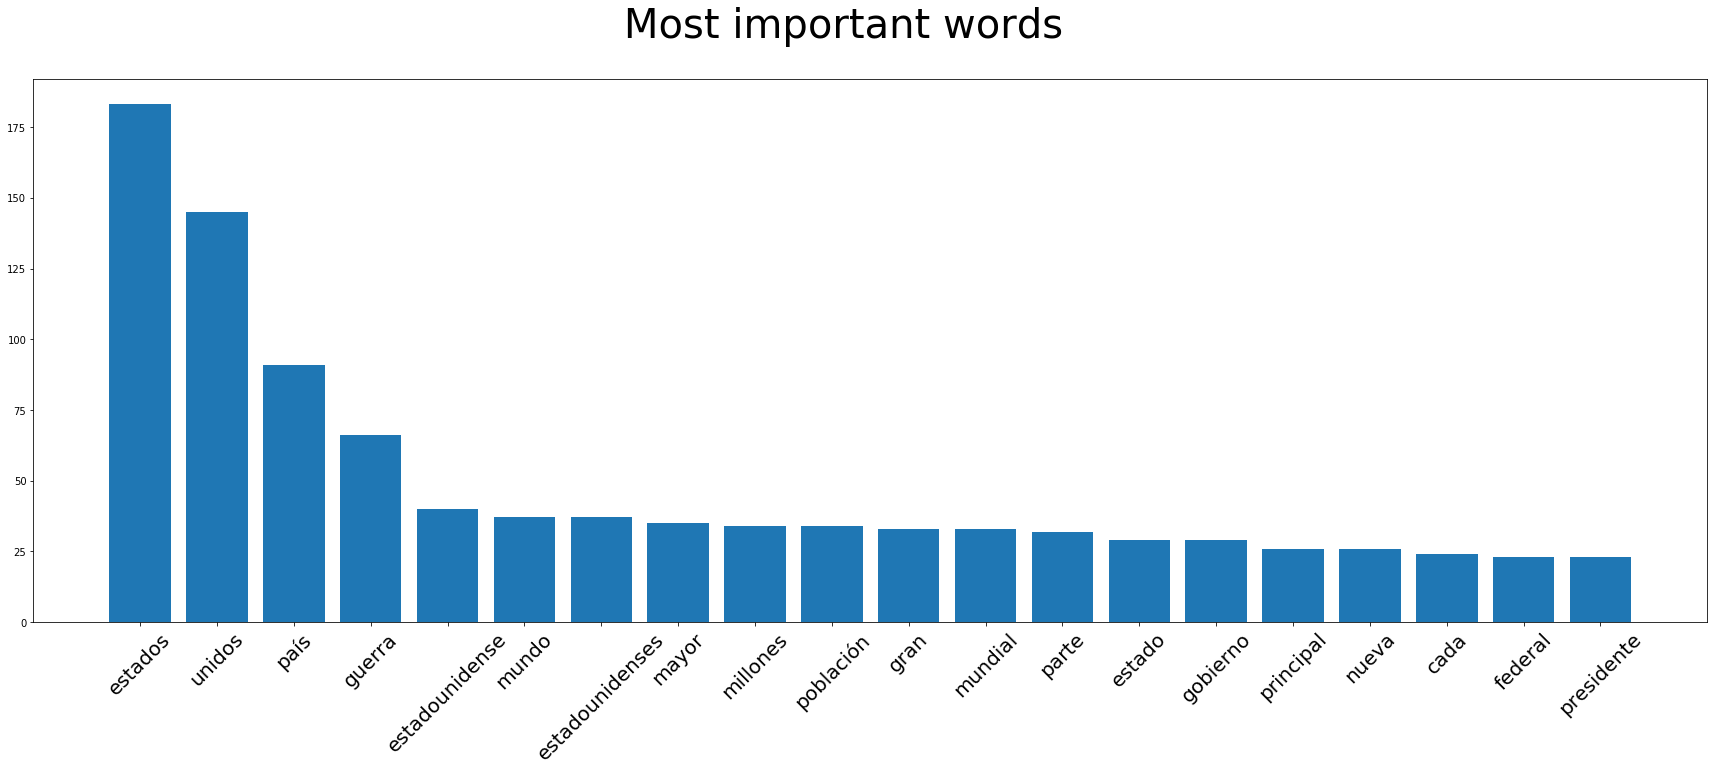

In [414]:
estados_unidos_file = open("EstadosUnidos.txt")
estados_unidos_content = " ".join(estados_unidos_file.readlines())
textGeneratorEstadosUnidos = TextGenerator(estados_unidos_content, 2)
textGeneratorEstadosUnidos.process_text()
textGeneratorEstadosUnidos.plot_most_important_words(20)

In [416]:
textGeneratorEstadosUnidos.generate_text(15)

'conservadurista y el norte industrial y progresista sobre los derechos de los órganos competentes ni firmado ni ratificado ni firmado ni ratificado firmado pero no ratificado ni firmado ni ratificado'

# Página de China en Wikipedia
A continuación alimentaremos el generador de texto con la página de China en español.

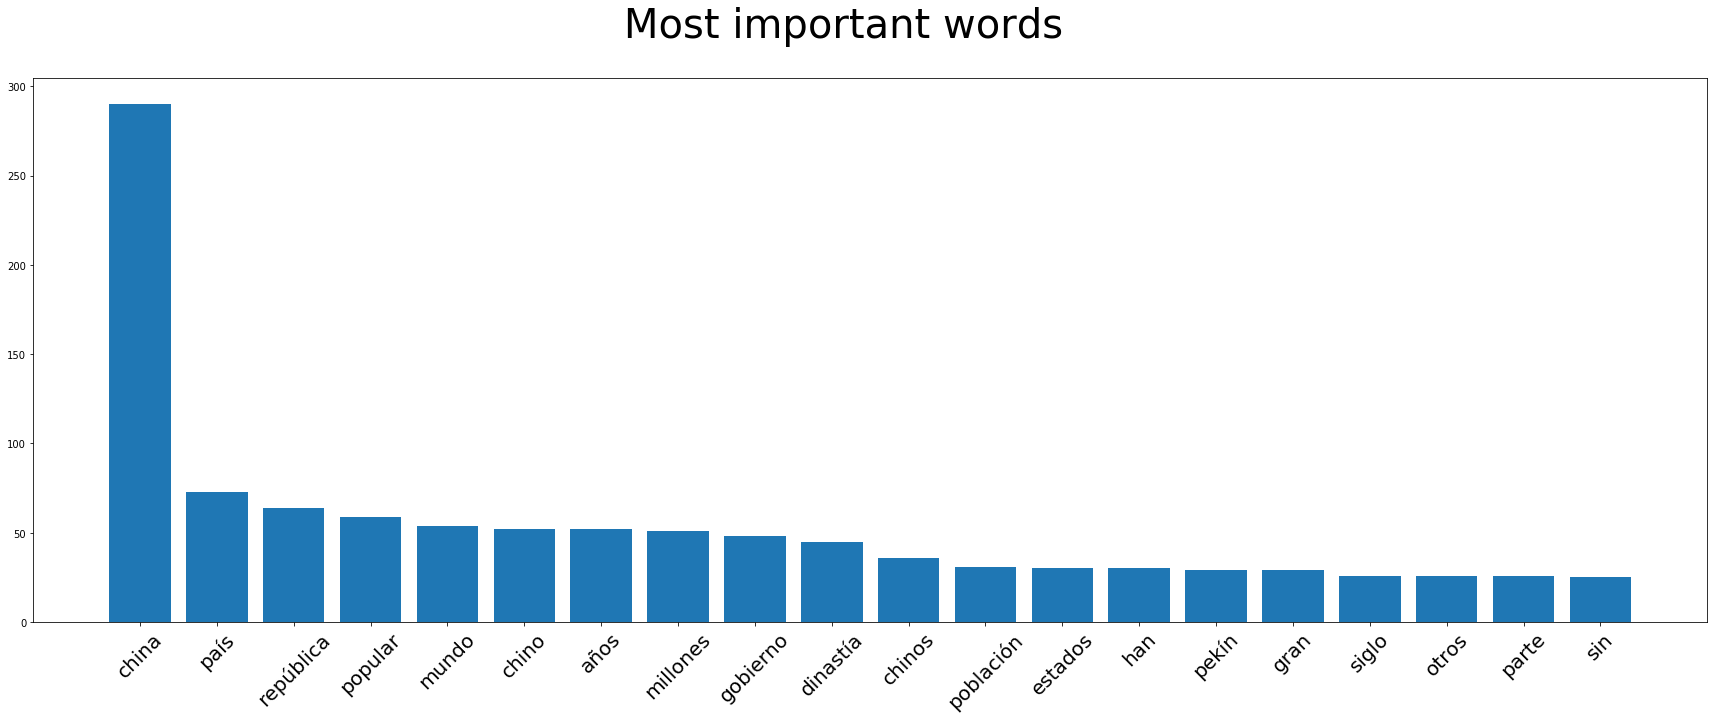

In [420]:
china_file = open("China.txt")
china_content = " ".join(china_file.readlines())
textGeneratorChina = TextGenerator(china_content, 3)
textGeneratorChina.process_text()
textGeneratorChina.plot_most_important_words(20)

In [423]:
textGeneratorChina.generate_text(15)

'horizon research consultancy group halló que los individuos que se identificaban como budistas correspondían al de los adultos chinos mientras que los cristianos comprendían cerca del y los musulmanes aproximadamente el algunas de las minorías étnicas practican religiones étnicas propias el dongbaismo es la religión'

# Discursos de Trump en campaña presidencial

Discursos originales de Donald Trump en la campaña presidencial, en inglés. Se agregaron muchas palabras a la la lista de palabras comunes que no se consideraron importantes o representativas para el análisis del discurso

Extraídos de https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt

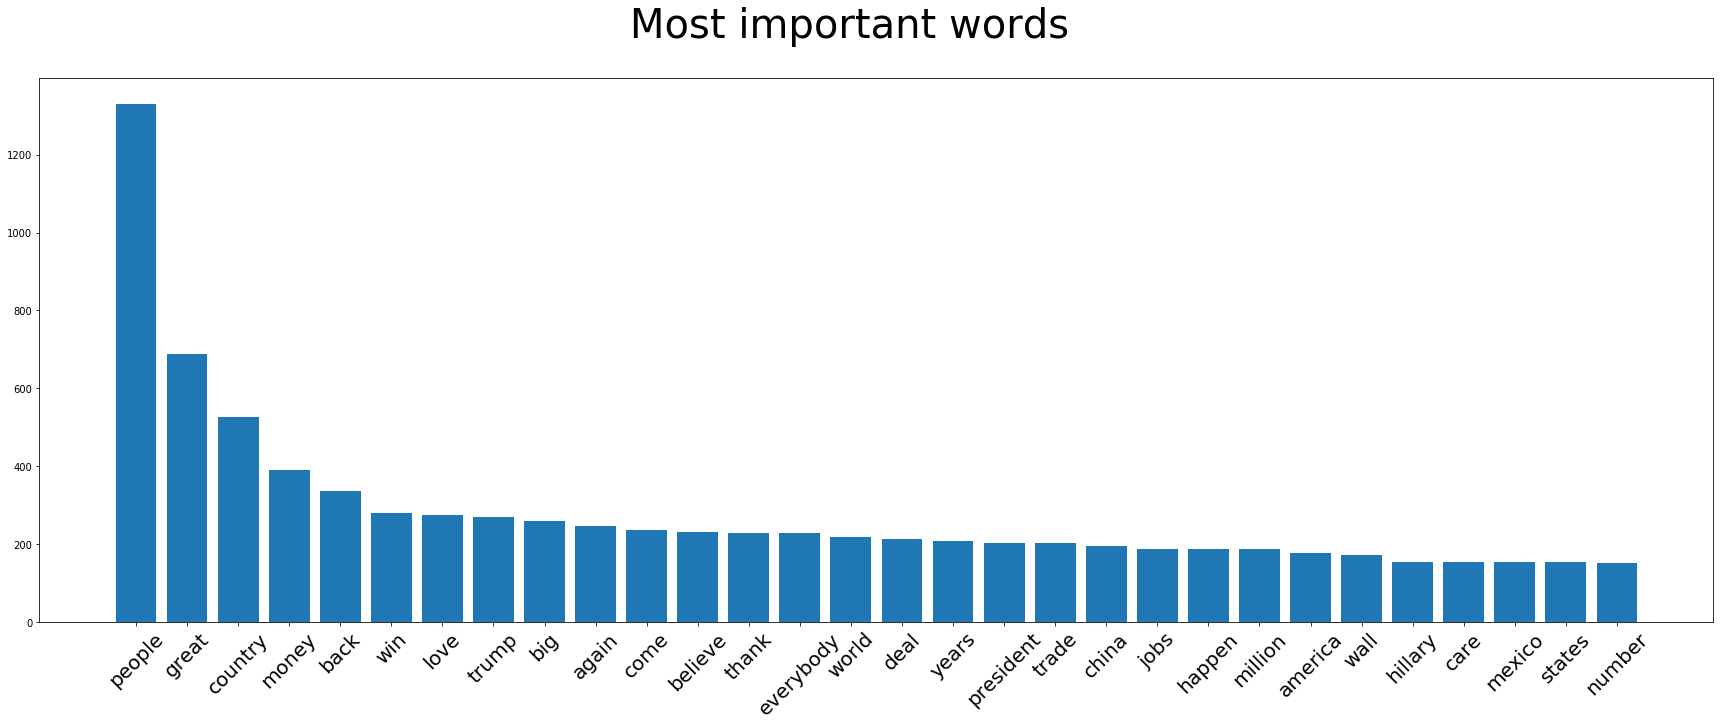

In [435]:
trump_file = open("Trump.txt")
trump_content = " ".join(trump_file.readlines())
textGeneratorTrump = TextGenerator(trump_content, 1)
textGeneratorTrump.process_text()
textGeneratorTrump.plot_most_important_words(30)

In [441]:
textGeneratorTrump.generate_text(15)

'youre wrong with we talk about illegal immigration on that brexits going on a statement'

### Evolución de los textos generados variando la cantidad de palabras tomadas

##### Con 1 palabra:
* youre wrong with we talk about illegal immigration on that brexits going on a statement

##### Con 2 palabras:
* job protected from unfair foreign competition whats happening to israel and we ended up gettingthe king of teleprompters but so million over years old picking up social security thats going

##### Con 3 palabras:
* unwanted people into the united states we will move the american embassy to the eternal capital of the jewish people jerusalem and we will build the wall because of the rulings of obamacare and you all know what im talking about so they end up

# Recopilación de noticias

Analizamos un gran dataset de noticias de diferentes medios de comunicación estadounidenses, en inglés.

Extraídos de https://catalog.ldc.upenn.edu/LDC97S44

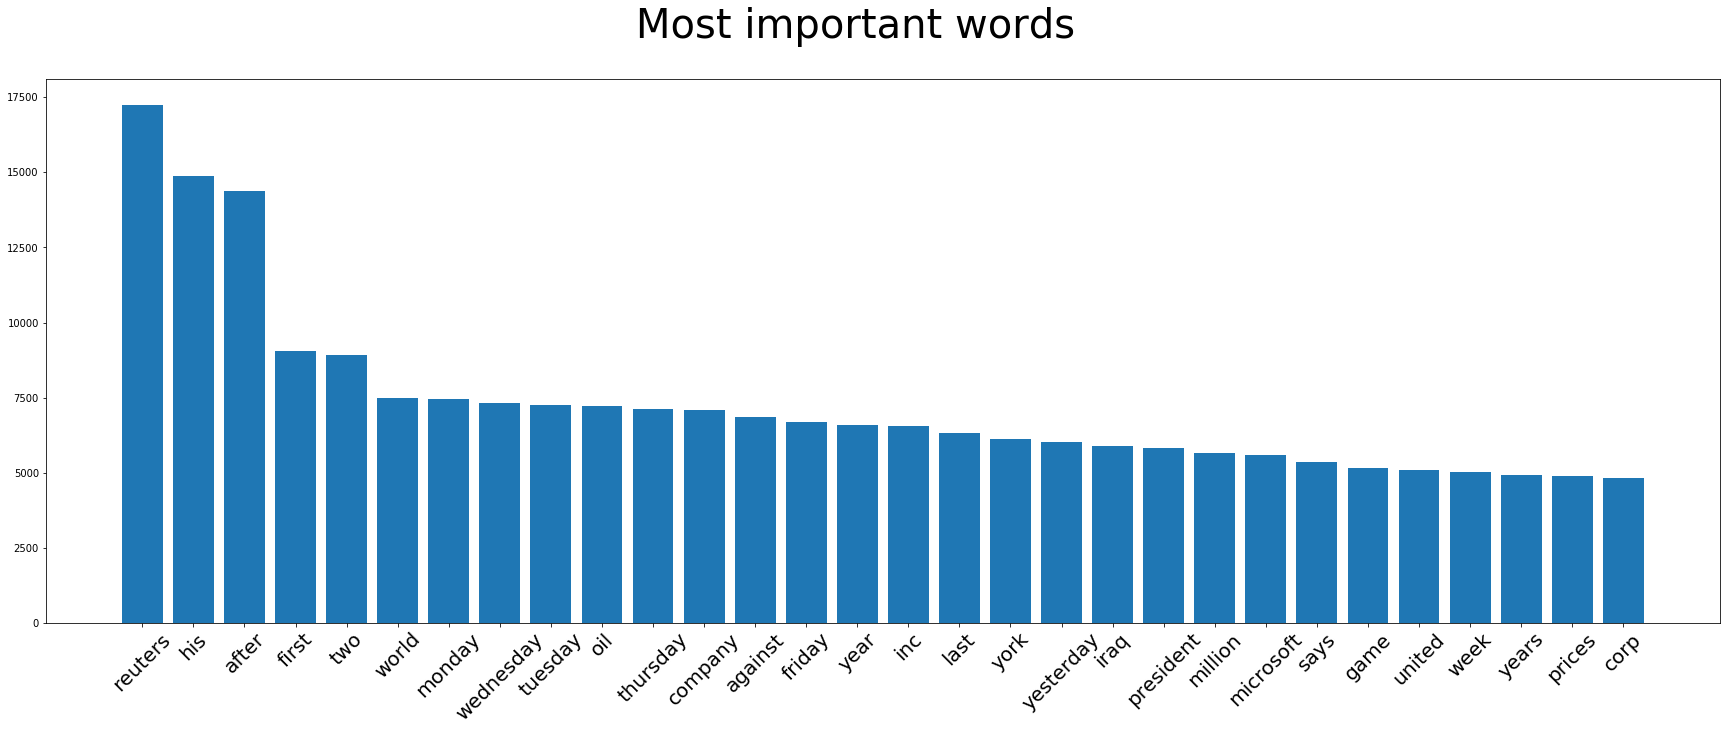

In [443]:
news_file = open("news.txt")
news_content = " ".join(news_file.readlines())
textGeneratorNews = TextGenerator(news_content, 3)
textGeneratorNews.process_text()
textGeneratorNews.plot_most_important_words(30)

In [444]:
textGeneratorNews.generate_text(15)

'knock the golden gloss off team usa jones ends up short in any department eta suspects held in raids a vast police operation in france and spain officials said ira would disarm if nirish deal is struck adams gerry adams leader of the irish republican'

### Evolución de los textos generados variando la cantidad de palabras tomadas

##### Con 1 palabra:

##### Con 2 palabras:

##### Con 3 palabras:
* knock the golden gloss off team usa jones ends up short in any department eta suspects held in raids a vast police operation in france and spain officials said ira would disarm if nirish deal is struck adams gerry adams leader of the irish republican